# New Haven Housing Prices

## Imports and Data Sources

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
from fredapi import Fred

In [2]:
fred_key = 'UPDATE STRING TO YOUR FRED API KEY'
fred = Fred(fred_key)

In [3]:
fed_rate     = fred.get_series('FEDFUNDS')
stock_market = fred.get_series('SP500')
unemployment = fred.get_series('UNRATE')
gdp          = fred.get_series('GDP')
inflation    = fred.get_series('CPIAUCSL')
rent_rate    = fred.get_series('CUUR0000SEHA')

In [4]:
# Pull in MarketWatch Data
dataframes = []

start = 1978

for year in range(start, 2015):  
    file = f"{year}-{year+1}.csv"
    
    df = pd.read_csv(f"data/{file}", parse_dates=['Date'], thousands=',')
    df.set_index('Date', inplace=True)
    df = df['Close']
    dataframes.append(df)

sp500 = pd.concat(dataframes, axis=0)

In [5]:
sp500.dropna(inplace=True)
stock_market.dropna(inplace=True)

In [6]:
combined_df = pd.concat([stock_market, sp500], axis=0)
combined_df.index.duplicated().sum()
df = combined_df
df = df[~df.index.duplicated(keep='first')]

In [7]:
stock_market = df
stock_market.isna().sum()
stock_market[stock_market.isna()]

Series([], dtype: float64)

In [8]:
fed_files = [fed_rate, stock_market, unemployment, gdp, inflation, rent_rate]

In [9]:
indicator = ['fed_rate', 'stock_market', 'unemployment', 'gdp', 'inflation', 'rent_rate']

for i, df in enumerate(fed_files):
    print(f"{indicator[i]} rows with NaN values: {df.isna().sum()}")

fed_rate rows with NaN values: 0
stock_market rows with NaN values: 0
unemployment rows with NaN values: 0
gdp rows with NaN values: 4
inflation rows with NaN values: 0
rent_rate rows with NaN values: 261


In [10]:
gdp.dropna(inplace=True)
rent_rate.dropna(inplace=True)

In [11]:
date = '1990-10-01'
print(fed_rate.loc[date], stock_market.loc[date], unemployment.loc[date], gdp.loc[date], inflation.loc[date], rent_rate.loc[date])

8.11 314.94 5.9 6004.733 133.4 140.5


In [12]:
print(date)
columns = ['interest', 'sp_index', 'unemp_rate', 'gdp', 'inflation', 'rent_index']
fed_data = pd.concat(fed_files, axis=1, keys=columns)
fed_data.loc[date]

1990-10-01


interest         8.110
sp_index       314.940
unemp_rate       5.900
gdp           6004.733
inflation      133.400
rent_index     140.500
Name: 1990-10-01 00:00:00, dtype: float64

In [13]:
df1 = fed_data.resample('W').mean()
df1 = df1['1978':]

In [14]:
fed_df = fed_data.ffill()
date = stock_market.index.min().strftime('%Y-%m-%d')
df2 = fed_df.loc[date:].copy()

In [15]:
df3 = fed_data

In [16]:
df1.to_csv('data/version_2.csv', index=True)             # 1978:2024 (weekly units, mean resampled)
df2.to_csv('data/1_economic_indicators.csv', index=True) # 1978:2024 (daily units, forward filled, most granular)
df3.to_csv('data/economic_indicators.csv', index=True)   # 1914:2024 (raw)

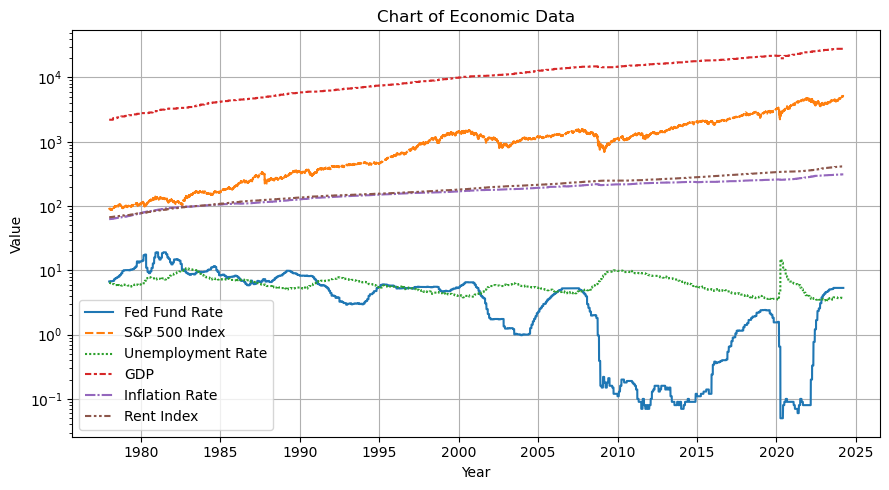

In [19]:
plt.figure(figsize=(9, 5))
df2.columns = ['Fed Fund Rate','S&P 500 Index', 'Unemployment Rate', 'GDP', 'Inflation Rate', 'Rent Index']
sns.lineplot(data=df2)

plt.title('Chart of Economic Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.grid(True)
plt.tight_layout()

plt.show()

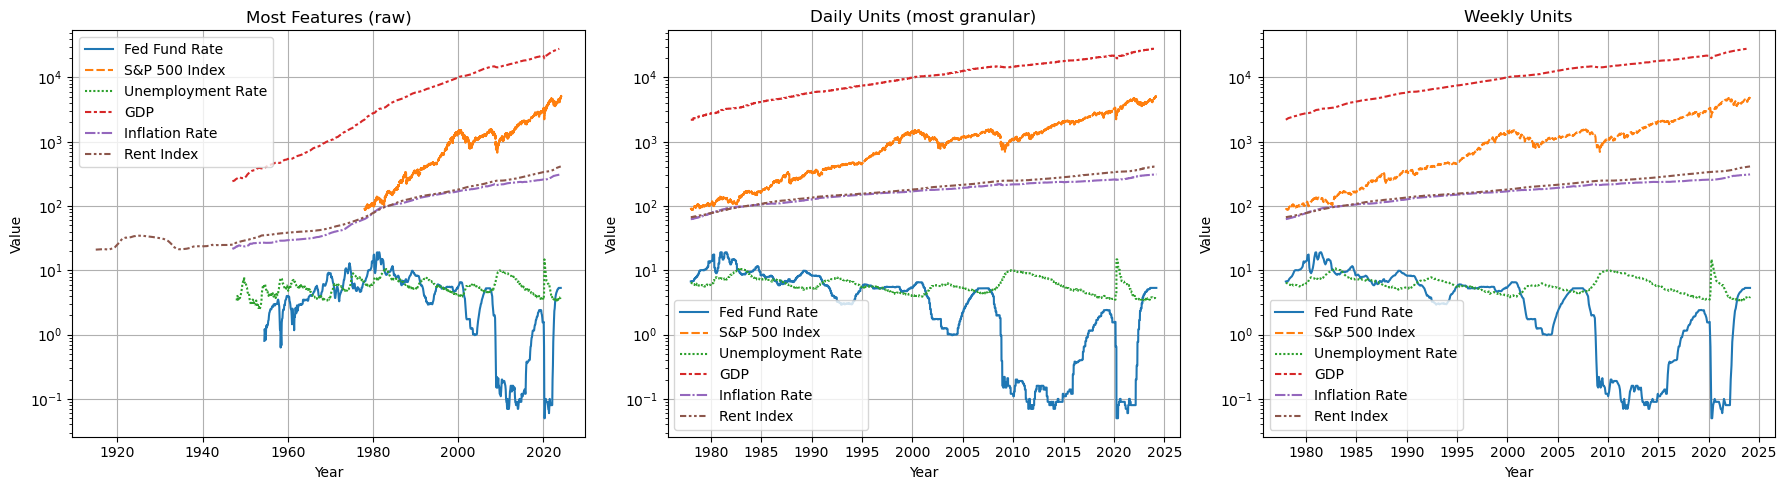

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

df1.columns = ['Fed Fund Rate','S&P 500 Index', 'Unemployment Rate', 'GDP', 'Inflation Rate', 'Rent Index']
sns.lineplot(data=df1, ax=axes[2])
axes[2].set_title('Weekly Units')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Value')
axes[2].set_yscale('log')
axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[2].grid(True)

df2.columns = ['Fed Fund Rate','S&P 500 Index', 'Unemployment Rate', 'GDP', 'Inflation Rate', 'Rent Index']
sns.lineplot(data=df2, ax=axes[1])
axes[1].set_title('Daily Units (most granular)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Value')
axes[1].set_yscale('log')
axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[1].xaxis.set_major_locator(mdates.YearLocator(5))
axes[1].grid(True)

df3.columns = ['Fed Fund Rate','S&P 500 Index', 'Unemployment Rate', 'GDP', 'Inflation Rate', 'Rent Index']
sns.lineplot(data=df3, ax=axes[0])
axes[0].set_title('Most Features (raw)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Value')
axes[0].set_yscale('log')
axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
axes[0].grid(True)

plt.tight_layout()
plt.show()